In [1]:
import imprint.nb_util as nb_util
nb_util.setup_nb()
import os
import time
import imprint as ip
from imprint.models.ztest import ZTest1D
import confirm.adagrid as ada
import confirm.cloud.clickhouse as ch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
g = ip.cartesian_grid(theta_min=[-1], theta_max=[1], null_hypos=[ip.hypo("x0 < 0")])
iter, reports, db = ada.ada_calibrate(
    ZTest1D,
    g=g,
    nB=5,
    tile_batch_size=1,
    packet_size=32,
    iter_size=32,
    grid_target=0.0001,
    bias_target=0.0001,
)

{'K_distribution': {8192: 2},
 'bias_tie': '-0.000024',
 'converged': False,
 'desc': 'working',
 'grid_cost': 0.019326683,
 'i': 0,
 'lamss': -1.9857934,
 'max(B_lamss)': '-1.887401',
 'min(B_lamss)': '-2.031679',
 'n_complete': 0,
 'n_deepen': 0,
 'n_impossible': 0,
 'n_processed': 2,
 'n_refine': 1,
 'runtime_cleanup': '0.003219',
 'runtime_convergence_check': '0.131467',
 'runtime_get_work': '0.002104',
 'runtime_new_packet': '0.000003',
 'runtime_processing': '0.053996',
 'runtime_refine_deepen': '0.113060',
 'spread_tie': '0.001587',
 'std_tie': '0.000552',
 'tie + slack': '0.024795',
 'tie_{k}(lamss)': '0.005493'}
{'K_distribution': {8192: 2, 16384: 1},
 'bias_tie': '0.000220',
 'converged': '0.000000',
 'desc': 'working',
 'grid_cost': 0.0127125885,
 'i': 1,
 'lamss': -1.9545794,
 'max(B_lamss)': '-1.938797',
 'min(B_lamss)': '-1.999353',
 'n_complete': 0,
 'n_deepen': 1,
 'n_impossible': 0,
 'n_processed': 3,
 'n_refine': 1,
 'runtime_cleanup': '0.003365',
 'runtime_convergenc

In [ ]:
db = ch.Clickhouse.connect(job_id="distributed")
iter, reports, db = ada.ada_calibrate(
    ZTest1D,
    g=g,
    nB=5,
    packet_size=32,
    iter_size=8,
    grid_target=0.0001,
    bias_target=0.0001,
)

In [ ]:
tiles = db.get_all()

In [4]:
ch.clear_dbs(db1.client, names=['distributed'], yes=True)

ERROR:clickhouse_connect.driver.httpclient:Code: 81. DB::Exception: Database distributed doesn't exist. (UNKNOWN_DATABASE) (version 22.12.1.21301 (official build))



Dropping the following databases:
['distributed']
drop database distributed


DatabaseError: :HTTPDriver for https://t2n4z83v82.us-east-1.aws.clickhouse.cloud:8443 returned response code 404)
 Code: 81. DB::Exception: Database distributed doesn't exist. (UNKNOWN_DATABASE) (version 22.12.1.21301 (official build))


In [14]:
# from confirm.adagrid.calibration import AdaCalibrationDriver, CalibrationConfig
# import json
# gtemp = ip.Grid(db1.get_all())
# null_hypos = [ip.hypo("x0 < 0")]
# c= CalibrationConfig(ZTest1D, *[None] * 16, defaults=db1.store.get('config').iloc[0].to_dict())
# model = ZTest1D(
#     seed=c.model_seed,
#     max_K=c.init_K * 2**c.n_K_double,
#     **json.loads(c.model_kwargs),
# )
# driver = AdaCalibrationDriver(None, model, null_hypos, c)
# driver.bootstrap_calibrate(gtemp.df, 0.025)
# gtemp.df['K'].value_counts()

True config


In [7]:
g = ip.cartesian_grid(theta_min=[-1], theta_max=[1], null_hypos=[ip.hypo("x0 < 0")])
db = ch.Clickhouse.connect(job_id='distributed')
_ = ada_calibrate(ZTest1D, db=db, g=g, n_iter=1, iter_size=8, grid_target=0.0001, bias_target=0.0001)

Connecting to t2n4z83v82.us-east-1.aws.clickhouse.cloud:8443/None as default.
Connecting to t2n4z83v82.us-east-1.aws.clickhouse.cloud:8443/distributed as default.
Connected to job distributed
{'K_distribution': {8192: 2},
 'bias_tie': '-0.000220',
 'grid_cost': 0.019326683,
 'i': 0,
 'lamss': -1.9857934,
 'max(B_lamss)': '-1.798113',
 'min(B_lamss)': '-2.068757',
 'n_complete': 0,
 'n_deepen': 0,
 'n_impossible': 0,
 'n_processed': 2,
 'n_refine': 1,
 'runtime_cleanup': '0.501476',
 'runtime_convergence_check': '0.768013',
 'runtime_processing': '0.082312',
 'runtime_refine_deepen': '0.226842',
 'spread_tie': '0.004028',
 'std_tie': '0.000810',
 'tie + slack': '0.024600',
 'tie_{k}(lamss)': '0.005493'}


In [8]:
job_id = db.job_id
def worker(i):
    db = ch.Clickhouse.connect(job_id=job_id)
    return ada_calibrate(ZTest1D, db=db, n_iter=100)[:2]
# iter_two2, reports_two2, ada_two2 = step(0)
import modal
stub = modal.Stub("two_workers")
wrapper = modal_util.modalize(stub)(worker)
with stub.run():
    results = list(wrapper.map([1, 2]))

Output()

✓ Initialized. View app at https://modal.com/apps/ap-BOOmKvdrCFf70Q0dGE2WQF

Output()

✓ Created objects.
├── 🔨 Created worker.
├── 🔨 Mounted /Users/tbent/confirm/confirmasaurus/confirm at /pkg/confirm
└── 🔨 Mounted /Users/tbent/confirm/confirmasaurus/imprint/imprint at /pkg/imprint

Output()

Connecting to t2n4z83v82.us-east-1.aws.clickhouse.cloud:8443/None as default.


Connecting to t2n4z83v82.us-east-1.aws.clickhouse.cloud:8443/distributed as default.


Connected to job distributed


Connecting to t2n4z83v82.us-east-1.aws.clickhouse.cloud:8443/None as default.


True config


Connecting to t2n4z83v82.us-east-1.aws.clickhouse.cloud:8443/distributed as default.


Connected to job distributed


True config


2023-01-11 02:21:07.945285: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64


2023-01-11 02:21:07.945313: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


2023-01-11T02:21:07+0000 No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


exists config   model_name  ...                                     platform


0    ZTest1D  ...  Linux-5.13.0-1029-aws-x86_64-with-glibc2.35


[1 rows x 22 columns]


2023-01-11 02:21:08.388863: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64


2023-01-11 02:21:08.388889: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


2023-01-11T02:21:08+0000 No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


exists config   model_name  ...                                     platform


0    ZTest1D  ...  Linux-5.13.0-1029-aws-x86_64-with-glibc2.35


[1 rows x 22 columns]


True null_hypos


True null_hypos


{'K_distribution': {8192: 2, 16384: 1},


 'bias_tie': '-0.000002',


 'grid_cost': 0.0127125885,


 'i': 0,


 'lamss': -1.9545794,


 'max(B_lamss)': '-1.902798',


 'min(B_lamss)': '-2.024673',


 'n_complete': 0,


 'n_deepen': 1,


 'n_impossible': 0,


 'n_processed': 3,


 'n_refine': 1,


 'runtime_cleanup': '0.327316',


 'runtime_convergence_check': '0.949161',


 'runtime_processing': '0.315361',


 'runtime_refine_deepen': '0.252197',


 'spread_tie': '0.005005',


 'std_tie': '0.001154',


 'tie + slack': '0.024795',


 'tie_{k}(lamss)': '0.012085'}


{'K_distribution': {8192: 2, 16384: 1},


 'bias_tie': '-0.000002',


 'grid_cost': 0.0127125885,


 'i': 0,


 'lamss': -1.9545794,


 'max(B_lamss)': '-1.902798',


 'min(B_lamss)': '-2.024673',


 'n_complete': 0,


 'n_deepen': 1,


 'n_impossible': 0,


 'n_processed': 3,


 'n_refine': 1,


 'runtime_cleanup': '0.526437',


 'runtime_convergence_check': '0.592920',


 'runtime_processing': '0.345811',


 'runtime_refine_deepen': '0.262752',


 'spread_tie': '0.005005',


 'std_tie': '0.001154',


 'tie + slack': '0.024795',


 'tie_{k}(lamss)': '0.012085'}


{'K_distribution': {8192: 2, 16384: 1, 32768: 1},


 'bias_tie': '-0.000205',


 'grid_cost': 0.007335838,


 'i': 1,


 'lamss': -1.9634643,


 'max(B_lamss)': '-1.911527',


 'min(B_lamss)': '-2.023798',


 'n_complete': 0,


 'n_deepen': 2,


 'n_impossible': 0,


 'n_processed': 4,


 'n_refine': 1,


 'runtime_cleanup': '0.293518',


 'runtime_convergence_check': '0.338144',


 'runtime_processing': '0.146789',


 'runtime_refine_deepen': '0.074740',


 'spread_tie': '0.005737',


 'std_tie': '0.001329',


 'tie + slack': '0.024587',


 'tie_{k}(lamss)': '0.017456'}


{'bias_tie': '-0.000205',


 'grid_cost': 0.007335838,


 'i': 1,


 'lamss': -1.9634643,


 'max(B_lamss)': '-1.911527',


 'min(B_lamss)': '-2.023798',


 'n_complete': 0,


 'n_deepen': 0,


 'n_impossible': 0,


 'n_refine': 0,


 'runtime_cleanup': '0.081371',


 'runtime_convergence_check': '0.312619',


 'spread_tie': '0.005737',


 'std_tie': '0.001329',


 'tie + slack': '0.024587',


 'tie_{k}(lamss)': '0.017456'}


{'K_distribution': {8192: 2, 16384: 1, 32768: 1, 65536: 1},


 'bias_tie': '-0.000298',


 'grid_cost': 0.0039445423,


 'i': 2,


 'lamss': -1.9590595,


 'max(B_lamss)': '-1.910285',


 'min(B_lamss)': '-2.008589',


 'n_complete': 0,


 'n_deepen': 3,


 'n_impossible': 0,


 'n_processed': 5,


 'n_refine': 1,


 'runtime_cleanup': '0.441216',


 'runtime_convergence_check': '0.313777',


 'runtime_processing': '0.220206',


 'runtime_refine_deepen': '0.076902',


 'spread_tie': '0.005371',


 'std_tie': '0.001330',


 'tie + slack': '0.024521',


 'tie_{k}(lamss)': '0.020874'}


{'K_distribution': {8192: 2, 16384: 1, 32768: 1, 65536: 1},


 'bias_tie': '-0.000205',


 'grid_cost': 0.007335838,


 'i': 2,


 'lamss': -1.9634643,


 'max(B_lamss)': '-1.911527',


 'min(B_lamss)': '-2.023798',


 'n_complete': 0,


 'n_deepen': 3,


 'n_impossible': 0,


 'n_processed': 5,


 'n_refine': 1,


 'runtime_cleanup': '0.354265',


 'runtime_convergence_check': '0.453841',


 'runtime_processing': '0.309230',


 'runtime_refine_deepen': '0.108927',


 'spread_tie': '0.005737',


 'std_tie': '0.001329',


 'tie + slack': '0.024587',


 'tie_{k}(lamss)': '0.017456'}


{'K_distribution': {8192: 2, 16384: 1, 32768: 1, 65536: 1, 131072: 1},


 'bias_tie': '-0.000281',


 'grid_cost': 0.002045676,


 'i': 3,


 'lamss': -1.944948,


 'max(B_lamss)': '-1.899986',


 'min(B_lamss)': '-2.002424',


 'n_complete': 0,


 'n_deepen': 4,


 'n_impossible': 0,


 'n_processed': 6,


 'n_refine': 1,


 'runtime_cleanup': '0.330602',


 'runtime_convergence_check': '0.293560',


 'runtime_processing': '0.354326',


 'runtime_refine_deepen': '0.078113',


 'spread_tie': '0.005005',


 'std_tie': '0.001272',


 'tie + slack': '0.024592',


 'tie_{k}(lamss)': '0.022827'}


{'K_distribution': {8192: 2, 16384: 1, 32768: 1, 65536: 1, 131072: 2},


 'bias_tie': '-0.000281',


 'grid_cost': 0.002045676,


 'i': 3,


 'lamss': -1.944948,


 'max(B_lamss)': '-1.899986',


 'min(B_lamss)': '-2.002424',


 'n_complete': 0,


 'n_deepen': 5,


 'n_impossible': 0,


 'n_processed': 7,


 'n_refine': 1,


 'runtime_cleanup': '0.414568',


 'runtime_convergence_check': '0.514677',


 'runtime_processing': '0.366389',


 'runtime_refine_deepen': '0.082994',


 'spread_tie': '0.005005',


 'std_tie': '0.001272',


 'tie + slack': '0.024592',


 'tie_{k}(lamss)': '0.022827'}


{'K_distribution': {8192: 2, 16384: 1, 32768: 1, 65536: 1, 131072: 4},


 'bias_tie': '-0.000342',


 'grid_cost': 0.0010417458,


 'i': 4,


 'lamss': -1.9499098,


 'max(B_lamss)': '-1.891494',


 'min(B_lamss)': '-2.002685',


 'n_complete': 0,


 'n_deepen': 5,


 'n_impossible': 0,


 'n_processed': 9,


 'n_refine': 2,


 'runtime_cleanup': '0.467935',


 'runtime_convergence_check': '0.420153',


 'runtime_processing': '0.345642',


 'runtime_refine_deepen': '0.110670',


 'spread_tie': '0.005371',


 'std_tie': '0.001321',


 'tie + slack': '0.024504',


 'tie_{k}(lamss)': '0.023804'}


{'K_distribution': {131072: 4},


 'bias_tie': '-0.000342',


 'grid_cost': 0.0010417458,


 'i': 4,


 'lamss': -1.9499098,


 'max(B_lamss)': '-1.891494',


 'min(B_lamss)': '-2.002685',


 'n_complete': 0,


 'n_deepen': 0,


 'n_impossible': 0,


 'n_processed': 4,


 'n_refine': 2,


 'runtime_cleanup': '0.332273',


 'runtime_convergence_check': '0.495323',


 'runtime_processing': '0.218602',


 'runtime_refine_deepen': '0.094131',


 'spread_tie': '0.005371',


 'std_tie': '0.001321',


 'tie + slack': '0.024504',


 'tie_{k}(lamss)': '0.023804'}


{'K_distribution': {16384: 2, 32768: 1, 65536: 1, 131072: 7},


 'bias_tie': '-0.000027',


 'grid_cost': 0.0005256701,


 'i': 5,


 'lamss': -1.9523972,


 'max(B_lamss)': '-1.890788',


 'min(B_lamss)': '-2.005622',


 'n_complete': 0,


 'n_deepen': 5,


 'n_impossible': 0,


 'n_processed': 11,


 'n_refine': 3,


 'runtime_cleanup': '0.381252',


 'runtime_convergence_check': '0.605595',


 'runtime_processing': '0.512577',


 'runtime_refine_deepen': '0.088292',


 'spread_tie': '0.005737',


 'std_tie': '0.001204',


 'tie + slack': '0.024791',


 'tie_{k}(lamss)': '0.024292'}


{'K_distribution': {16384: 2, 32768: 1, 65536: 1, 131072: 7},


 'bias_tie': '-0.000027',


 'grid_cost': 0.0005256701,


 'i': 5,


 'lamss': -1.9523972,


 'max(B_lamss)': '-1.890788',


 'min(B_lamss)': '-2.005622',


 'n_complete': 0,


 'n_deepen': 5,


 'n_impossible': 0,


 'n_processed': 11,


 'n_refine': 3,


 'runtime_cleanup': '0.366359',


 'runtime_convergence_check': '0.514784',


 'runtime_processing': '0.522578',


 'runtime_refine_deepen': '0.085381',


 'spread_tie': '0.005737',


 'std_tie': '0.001204',


 'tie + slack': '0.024791',


 'tie_{k}(lamss)': '0.024292'}


{'K_distribution': {32768: 2, 65536: 1, 131072: 9},


 'bias_tie': '0.000222',


 'grid_cost': 0.0005256701,


 'i': 6,


 'lamss': -1.9537866,


 'max(B_lamss)': '-1.914193',


 'min(B_lamss)': '-1.993012',


 'n_complete': 0,


 'n_deepen': 4,


 'n_impossible': 0,


 'n_processed': 12,


 'n_refine': 4,


 'runtime_cleanup': '0.400077',


 'runtime_convergence_check': '0.496608',


 'runtime_processing': '0.616812',


 'runtime_refine_deepen': '0.087327',


 'spread_tie': '0.004089',


 'std_tie': '0.001092',


 'tie + slack': '0.025162',


 'tie_{k}(lamss)': '0.024414'}


{'K_distribution': {32768: 2, 65536: 1, 131072: 9},


 'bias_tie': '0.000222',


 'grid_cost': 0.0005256701,


 'i': 6,


 'lamss': -1.9537866,


 'max(B_lamss)': '-1.914193',


 'min(B_lamss)': '-1.993012',


 'n_complete': 0,


 'n_deepen': 4,


 'n_impossible': 0,


 'n_processed': 12,


 'n_refine': 4,


 'runtime_cleanup': '0.415468',


 'runtime_convergence_check': '0.606955',


 'runtime_processing': '0.631355',


 'runtime_refine_deepen': '0.090180',


 'spread_tie': '0.004089',


 'std_tie': '0.001092',


 'tie + slack': '0.025162',


 'tie_{k}(lamss)': '0.024414'}


{'K_distribution': {32768: 2, 65536: 1, 131072: 11},


 'bias_tie': '-0.000045',


 'grid_cost': 0.0005256701,


 'i': 7,


 'lamss': -1.9585172,


 'max(B_lamss)': '-1.922150',


 'min(B_lamss)': '-1.981422',


 'n_complete': 0,


 'n_deepen': 2,


 'n_impossible': 0,


 'n_processed': 14,


 'n_refine': 6,


 'runtime_cleanup': '0.399814',


 'runtime_convergence_check': '0.662424',


 'runtime_processing': '0.617759',


 'runtime_refine_deepen': '0.091173',


 'spread_tie': '0.003326',


 'std_tie': '0.000890',


 'tie + slack': '0.024895',


 'tie_{k}(lamss)': '0.024414'}


{'K_distribution': {32768: 2, 65536: 1, 131072: 11},


 'bias_tie': '-0.000045',


 'grid_cost': 0.0005256701,


 'i': 7,


 'lamss': -1.9585172,


 'max(B_lamss)': '-1.922150',


 'min(B_lamss)': '-1.981422',


 'n_complete': 0,


 'n_deepen': 2,


 'n_impossible': 0,


 'n_processed': 14,


 'n_refine': 6,


 'runtime_cleanup': '0.419330',


 'runtime_convergence_check': '0.713721',


 'runtime_processing': '0.626581',


 'runtime_refine_deepen': '0.105506',


 'spread_tie': '0.003326',


 'std_tie': '0.000890',


 'tie + slack': '0.024895',


 'tie_{k}(lamss)': '0.024414'}


{'K_distribution': {32768: 2, 65536: 1, 131072: 11},


 'bias_tie': '0.000126',


 'grid_cost': 0.000264043,


 'i': 8,


 'lamss': -1.9585243,


 'max(B_lamss)': '-1.928307',


 'min(B_lamss)': '-1.979097',


 'n_complete': 0,


 'n_deepen': 2,


 'n_impossible': 0,


 'n_processed': 14,


 'n_refine': 6,


 'runtime_cleanup': '0.344388',


 'runtime_convergence_check': '0.528586',


 'runtime_processing': '0.542842',


 'runtime_refine_deepen': '0.134823',


 'spread_tie': '0.002838',


 'std_tie': '0.000702',


 'tie + slack': '0.025079',


 'tie_{k}(lamss)': '0.024689'}


{'K_distribution': {32768: 2, 65536: 1, 131072: 11},


 'bias_tie': '0.000126',


 'grid_cost': 0.000264043,


 'i': 8,


 'lamss': -1.9585243,


 'max(B_lamss)': '-1.928307',


 'min(B_lamss)': '-1.979097',


 'n_complete': 0,


 'n_deepen': 2,


 'n_impossible': 0,


 'n_processed': 14,


 'n_refine': 6,


 'runtime_cleanup': '0.272202',


 'runtime_convergence_check': '0.502321',


 'runtime_processing': '0.546783',


 'runtime_refine_deepen': '0.082999',


 'spread_tie': '0.002838',


 'std_tie': '0.000702',


 'tie + slack': '0.025079',


 'tie_{k}(lamss)': '0.024689'}


{'K_distribution': {65536: 2, 131072: 11},


 'bias_tie': '0.000350',


 'grid_cost': 0.00013232417,


 'i': 9,


 'lamss': -1.9582566,


 'max(B_lamss)': '-1.936772',


 'min(B_lamss)': '-1.980363',


 'n_complete': 0,


 'n_deepen': 3,


 'n_impossible': 0,


 'n_processed': 13,


 'n_refine': 5,


 'runtime_cleanup': '0.313950',


 'runtime_convergence_check': '0.645851',


 'runtime_processing': '0.506488',


 'runtime_refine_deepen': '0.087065',


 'spread_tie': '0.002563',


 'std_tie': '0.000548',


 'tie + slack': '0.025293',


 'tie_{k}(lamss)': '0.024811'}


{'K_distribution': {65536: 2, 131072: 11},


 'bias_tie': '0.000350',


 'grid_cost': 0.00013232417,


 'i': 9,


 'lamss': -1.9582566,


 'max(B_lamss)': '-1.936772',


 'min(B_lamss)': '-1.980363',


 'n_complete': 0,


 'n_deepen': 3,


 'n_impossible': 0,


 'n_processed': 13,


 'n_refine': 5,


 'runtime_cleanup': '0.537602',


 'runtime_convergence_check': '0.622494',


 'runtime_processing': '0.511081',


 'runtime_refine_deepen': '0.097517',


 'spread_tie': '0.002563',


 'std_tie': '0.000548',


 'tie + slack': '0.025293',


 'tie_{k}(lamss)': '0.024811'}


{'K_distribution': {131072: 14},


 'bias_tie': '0.000279',


 'grid_cost': 0.00013232417,


 'i': 10,


 'lamss': -1.9560716,


 'max(B_lamss)': '-1.936620',


 'min(B_lamss)': '-1.980363',


 'n_complete': 0,


 'n_deepen': 2,


 'n_impossible': 0,


 'n_processed': 14,


 'n_refine': 6,


 'runtime_cleanup': '0.411098',


 'runtime_convergence_check': '0.665879',


 'runtime_processing': '0.649031',


 'runtime_refine_deepen': '0.100152',


 'spread_tie': '0.002518',


 'std_tie': '0.000506',


 'tie + slack': '0.025253',


 'tie_{k}(lamss)': '0.024841'}


{'K_distribution': {131072: 14},


 'bias_tie': '0.000279',


 'grid_cost': 0.00013232417,


 'i': 10,


 'lamss': -1.9560716,


 'max(B_lamss)': '-1.936620',


 'min(B_lamss)': '-1.980363',


 'n_complete': 0,


 'n_deepen': 2,


 'n_impossible': 0,


 'n_processed': 14,


 'n_refine': 6,


 'runtime_cleanup': '0.322089',


 'runtime_convergence_check': '0.642700',


 'runtime_processing': '0.671392',


 'runtime_refine_deepen': '0.074580',


 'spread_tie': '0.002518',


 'std_tie': '0.000506',


 'tie + slack': '0.025253',


 'tie_{k}(lamss)': '0.024841'}


{'K_distribution': {131072: 16},


 'bias_tie': '0.000047',


 'grid_cost': 0.00013232417,


 'i': 11,


 'lamss': -1.9628606,


 'max(B_lamss)': '-1.934336',


 'min(B_lamss)': '-1.987006',


 'n_complete': 0,


 'n_deepen': 0,


 'n_impossible': 0,


 'n_processed': 16,


 'n_refine': 8,


 'runtime_cleanup': '0.420482',


 'runtime_convergence_check': '0.511058',


 'runtime_processing': '0.650313',


 'runtime_refine_deepen': '0.083531',


 'spread_tie': '0.002861',


 'std_tie': '0.000573',


 'tie + slack': '0.025035',


 'tie_{k}(lamss)': '0.024857'}


{'bias_tie': '0.000053',


 'grid_cost': 6.6237524e-05,


 'i': 12,


 'lamss': -1.9629546,


 'max(B_lamss)': '-1.933407',


 'min(B_lamss)': '-1.986514',


 'n_impossible': 0,


 'runtime_convergence_check': '0.491767',


 'spread_tie': '0.002861',


 'std_tie': '0.000571',


 'tie + slack': '0.025044',


 'tie_{k}(lamss)': '0.024925'}


{'K_distribution': {131072: 16},


 'bias_tie': '0.000047',


 'grid_cost': 0.00013232417,


 'i': 11,


 'lamss': -1.9628606,


 'max(B_lamss)': '-1.934336',


 'min(B_lamss)': '-1.987006',


 'n_complete': 0,


 'n_deepen': 0,


 'n_impossible': 0,


 'n_processed': 16,


 'n_refine': 8,


 'runtime_cleanup': '0.303000',


 'runtime_convergence_check': '0.598943',


 'runtime_processing': '0.656765',


 'runtime_refine_deepen': '0.086185',


 'spread_tie': '0.002861',


 'std_tie': '0.000573',


 'tie + slack': '0.025035',


 'tie_{k}(lamss)': '0.024857'}


{'bias_tie': '0.000053',


 'grid_cost': 6.6237524e-05,


 'i': 12,


 'lamss': -1.9629546,


 'max(B_lamss)': '-1.933407',


 'min(B_lamss)': '-1.986514',


 'n_impossible': 0,


 'runtime_convergence_check': '0.540273',


 'spread_tie': '0.002861',


 'std_tie': '0.000571',


 'tie + slack': '0.025044',


 'tie_{k}(lamss)': '0.024925'}


✓ App completed.

In [17]:
db.worst_tile('lams')

,id,active,parent_id,theta0,radii0,null_truth0,K,alpha0,grid_cost,impossible,orderer,lams,B_lams0,B_lams1,B_lams2,B_lams3,B_lams4,B_lams5,B_lams6,B_lams7,B_lams8,B_lams9,B_lams10,B_lams11,B_lams12,B_lams13,B_lams14,B_lams15,B_lams16,B_lams17,B_lams18,B_lams19,B_lams20,B_lams21,B_lams22,B_lams23,B_lams24,B_lams25,B_lams26,B_lams27,B_lams28,B_lams29,B_lams30,B_lams31,B_lams32,B_lams33,B_lams34,B_lams35,B_lams36,B_lams37,B_lams38,B_lams39,B_lams40,B_lams41,B_lams42,B_lams43,B_lams44,B_lams45,B_lams46,B_lams47,B_lams48,B_lams49,twb_lams0,twb_lams1,twb_lams2,twb_lams3,twb_lams4,twb_lams5,twb_lams6,twb_lams7,twb_lams8,twb_lams9,twb_lams10,twb_lams11,twb_lams12,twb_lams13,twb_lams14,twb_lams15,twb_lams16,twb_lams17,twb_lams18,twb_lams19,twb_lams20,twb_lams21,twb_lams22,twb_lams23,twb_lams24,twb_lams25,twb_lams26,twb_lams27,twb_lams28,twb_lams29,twb_lams30,twb_lams31,twb_lams32,twb_lams33,twb_lams34,twb_lams35,twb_lams36,twb_lams37,twb_lams38,twb_lams39,twb_lams40,twb_lams41,twb_lams42,twb_lams43,twb_lams44,twb_lams45,twb_lams46,twb_lams47,twb_lams48,twb_lams49,twb_min_lams,twb_mean_lams,twb_max_lams,worker_id,birthiter,birthtime,eligible
0,4314962121109798913,1,4314961914951368704,-0.000977,0.000977,1,131072,0.024934,0.000066,0,-1.98048,-1.962955,-1.977205,-1.933407,-1.951893,-1.986514,-1.968618,-1.969336,-1.954626,-1.960623,-1.95731,-1.961715,-1.966287,-1.970392,-1.963837,-1.961454,-1.951085,-1.964332,-1.954349,-1.976983,-1.964354,-1.939287,-1.969342,-1.961313,-1.969013,-1.96701,-1.956662,-1.963559,-1.947736,-1.983023,-1.950786,-1.963407,-1.954763,-1.95731,-1.981023,-1.967217,-1.939289,-1.970929,-1.966397,-1.958448,-1.981867,-1.977207,-1.962502,-1.960048,-1.978019,-1.966714,-1.952595,-1.969336,-1.972361,-1.973286,-1.957325,-1.974628,-1.955119,-1.954577,-1.957325,-1.96759,-1.974523,-1.973124,-1.962955,-1.972361,-1.96701,-1.963837,-1.966362,-1.963491,-1.969771,-1.977044,-1.951219,-1.95427,-1.98048,-1.963864,-1.961313,-1.9684,-1.95364,-1.973699,-1.955682,-1.963967,-1.962318,-1.954349,-1.963282,-1.965409,-1.951754,-1.960629,-1.961313,-1.954349,-1.953719,-1.959556,-1.964961,-1.960048,-1.953182,-1.95445,-1.966362,-1.964332,-1.960623,-1.954213,-1.957325,-1.963025,-1.970689,-1.963025,-1.970929,-1.961715,-1.950842,-1.973848,-1.98048,-1.962557,-1.950842,11,11,1.673404e+09,1


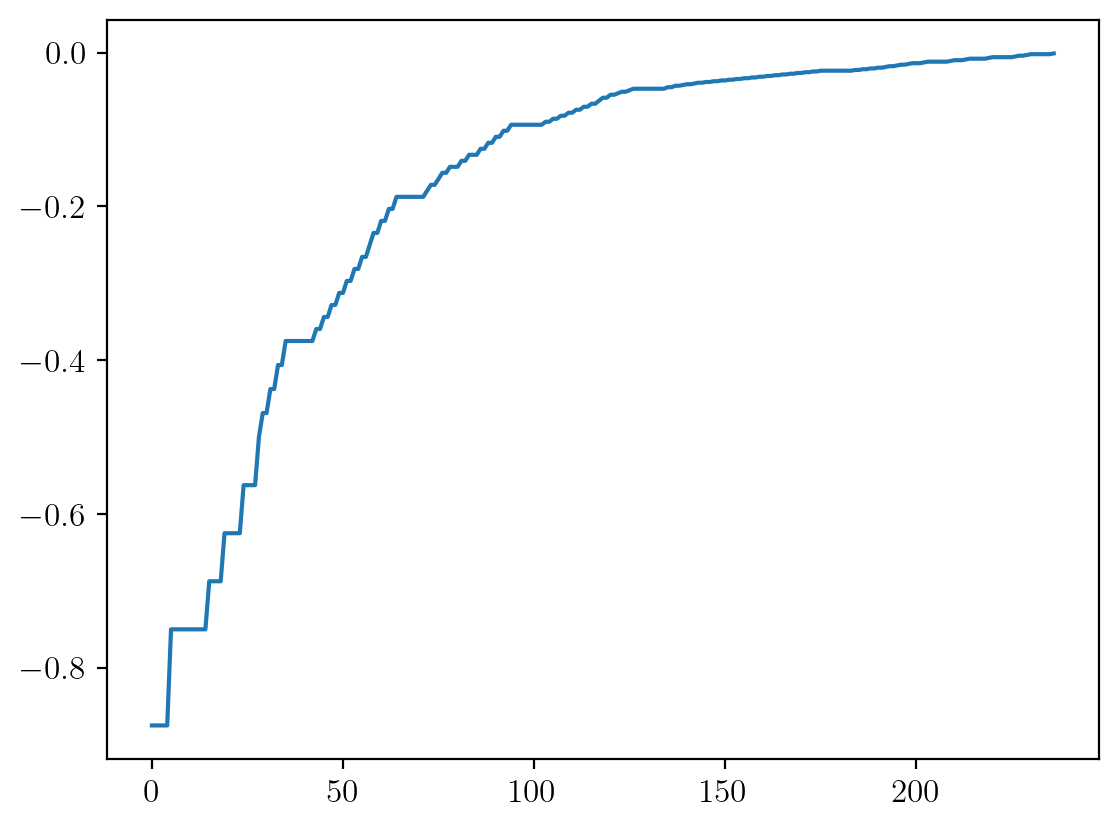

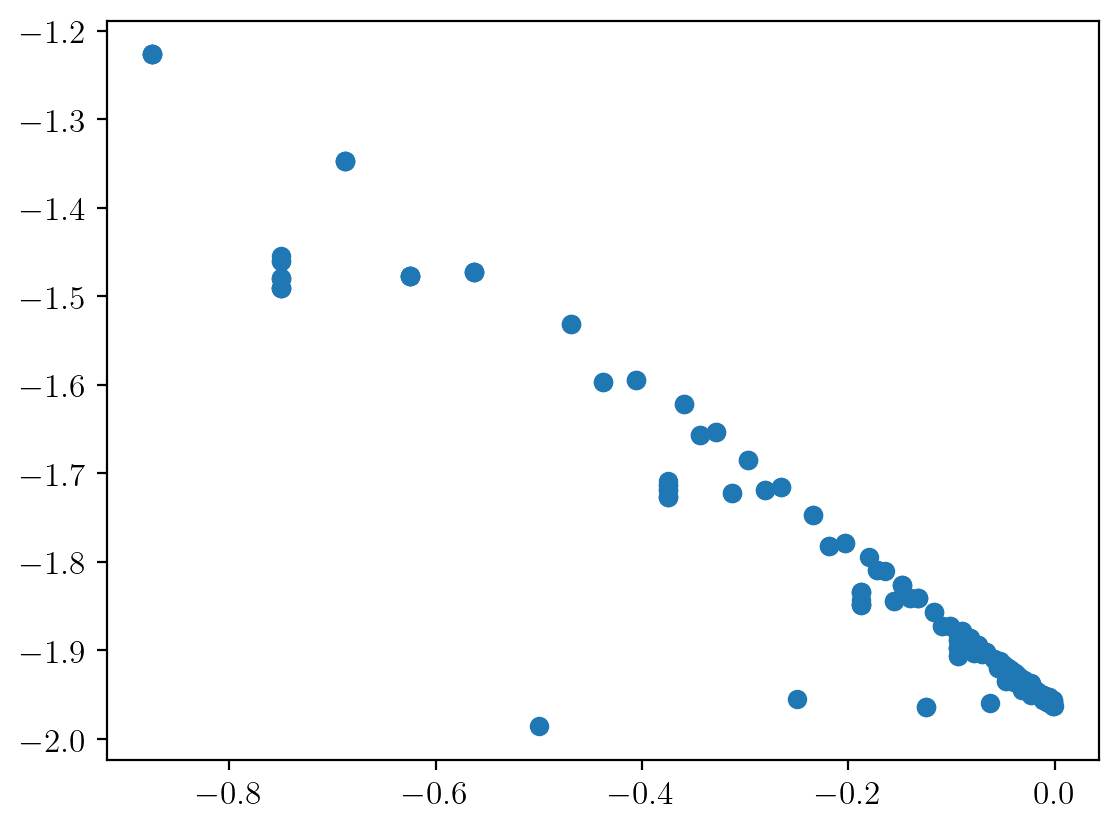

In [14]:
df2 = db.get_all()
plt.plot(np.sort(df2['theta0']))
plt.show()
plt.plot(df2['theta0'], df2['lams'], 'o')
plt.show()

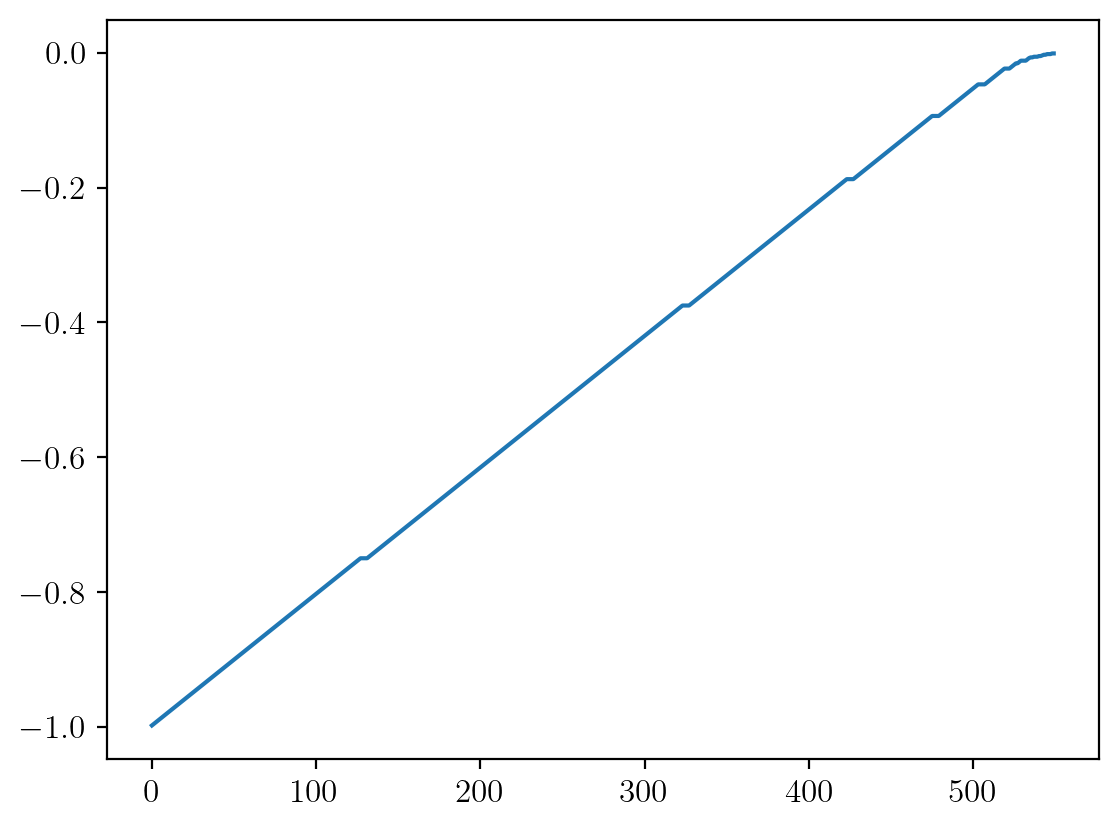

In [12]:
plt.plot(np.sort(db1.get_all()['theta0']))
plt.show()